In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
df = pd.read_csv("/content/drive/MyDrive/Lung Cancer Dataset.csv")

In [78]:
df.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

In [80]:
df.isna().sum()

,0
AGE,0
GENDER,0
SMOKING,0
FINGER_DISCOLORATION,0
MENTAL_STRESS,0
EXPOSURE_TO_POLLUTION,0
LONG_TERM_ILLNESS,0
ENERGY_LEVEL,0
IMMUNE_WEAKNESS,0
BREATHING_ISSUE,0


In [81]:
label_encoder = LabelEncoder()

In [82]:
df['PULMONARY_DISEASE'] = label_encoder.fit_transform(df['PULMONARY_DISEASE'])

In [83]:
X = df.drop('PULMONARY_DISEASE', axis=1)

In [84]:
y = df['PULMONARY_DISEASE']

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [86]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:29:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [87]:
y_pred = model.predict(X_test)

In [88]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       571
           1       0.87      0.89      0.88       429

    accuracy                           0.90      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.90      0.90      0.90      1000

Confusion Matrix:
 [[516  55]
 [ 49 380]]
Accuracy: 0.8960


In [89]:
def predict_disease(input_data):
    input_df = pd.DataFrame([input_data])
    prediction = model.predict(input_df)[0]
    result = label_encoder.inverse_transform([prediction])[0]
    return f"🩺 Predicted Lung Cancer Risk: {result}"

In [90]:
manual_input = {
    'AGE': 55,
    'GENDER': 1,  # 0 = Female, 1 = Male
    'SMOKING': 1,
    'FINGER_DISCOLORATION': 1,
    'MENTAL_STRESS': 0,
    'EXPOSURE_TO_POLLUTION': 1,
    'LONG_TERM_ILLNESS': 0,
    'ENERGY_LEVEL': 3.5,
    'IMMUNE_WEAKNESS': 1,
    'BREATHING_ISSUE': 1,
    'ALCOHOL_CONSUMPTION': 0,
    'THROAT_DISCOMFORT': 1,
    'OXYGEN_SATURATION': 91.0,
    'CHEST_TIGHTNESS': 1,
    'FAMILY_HISTORY': 1,
    'SMOKING_FAMILY_HISTORY': 1,
    'STRESS_IMMUNE': 0
}

print(predict_disease(manual_input))

🩺 Predicted Lung Cancer Risk: YES


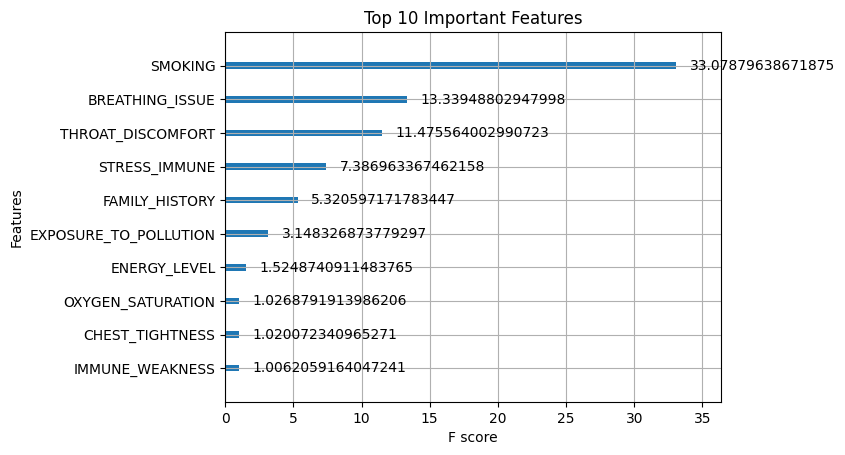

In [91]:
from xgboost import plot_importance

plot_importance(model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Important Features")
plt.show()

<ipython-input-92-42e6f3365776>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PULMONARY_DISEASE', data=df, palette=color_palette)


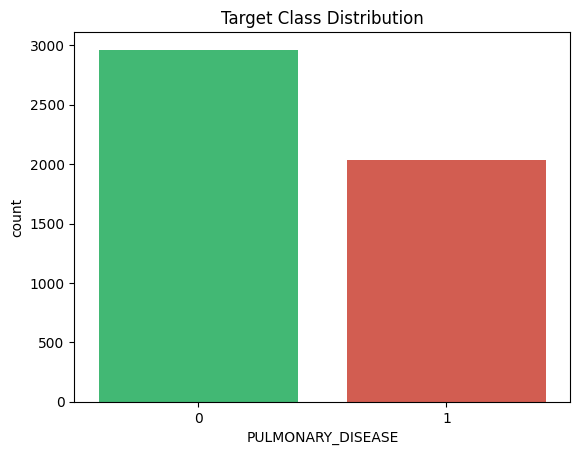

In [92]:
color_palette = {
    '0': '#2ecc71',
    '1': '#e74c3c'
}
sns.countplot(x='PULMONARY_DISEASE', data=df, palette=color_palette)
plt.title('Target Class Distribution')
plt.show()

<ipython-input-93-a2a825b2bf21>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PULMONARY_DISEASE', y='AGE', data=df, palette=color_palette)


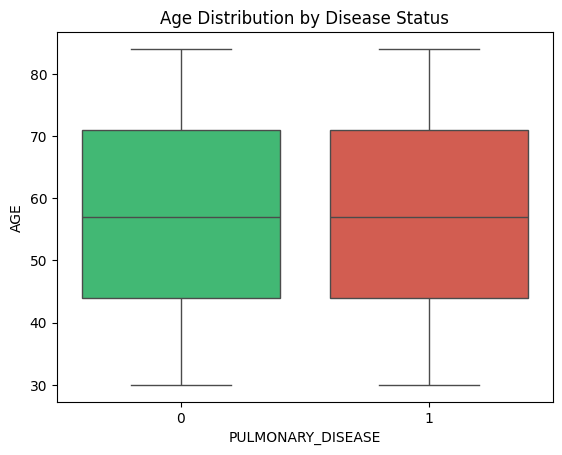

In [93]:
sns.boxplot(x='PULMONARY_DISEASE', y='AGE', data=df, palette=color_palette)
plt.title('Age Distribution by Disease Status')
plt.show()

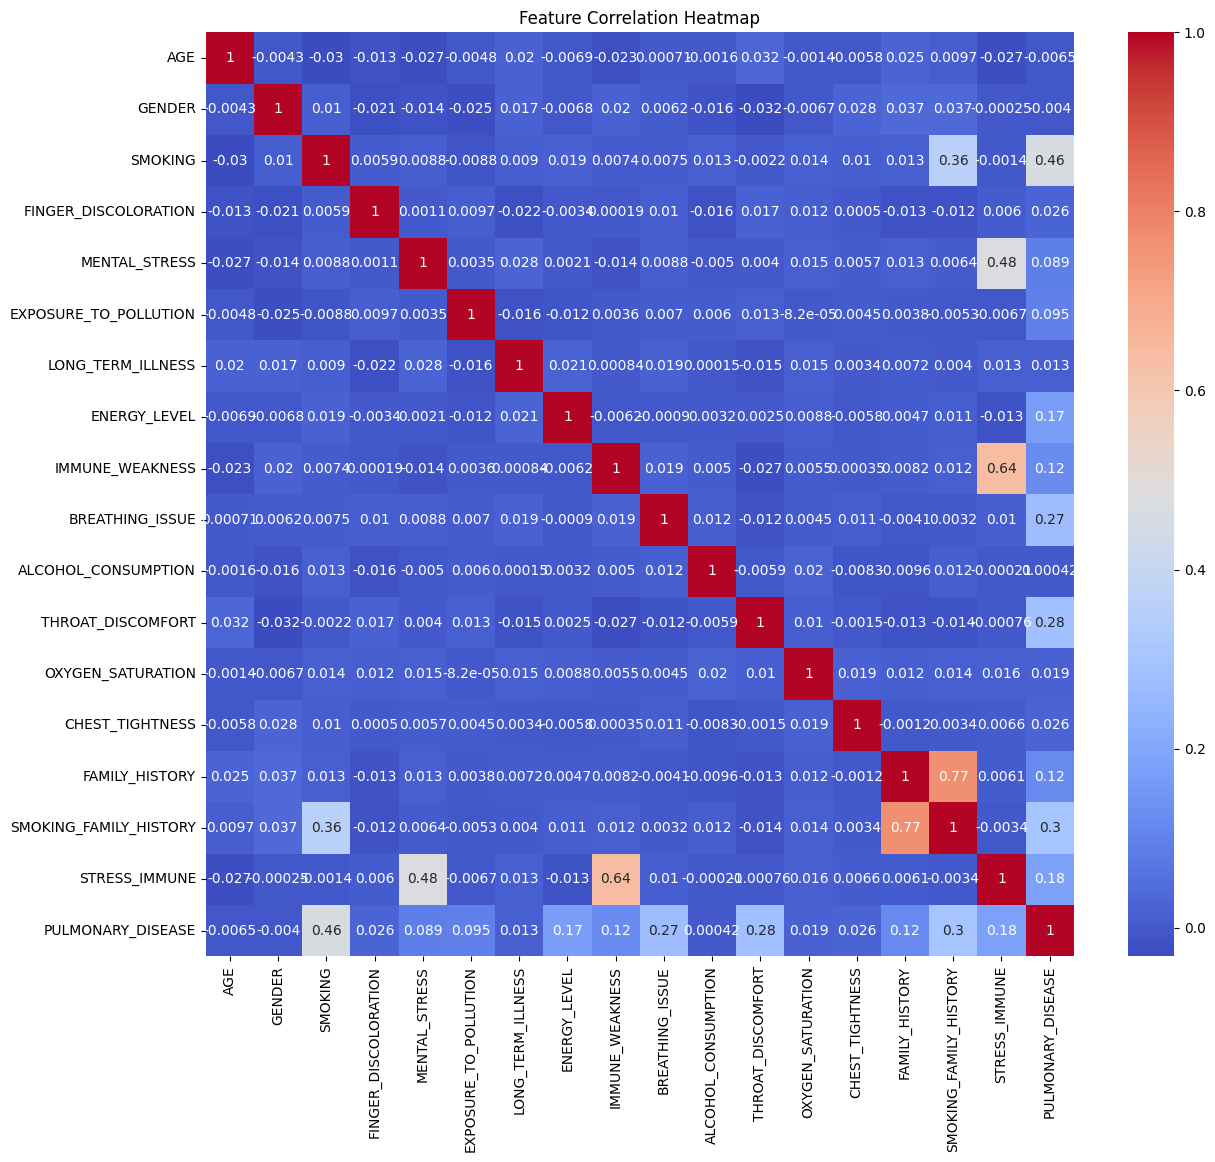

In [94]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
